# Talk-to-Listen Ratio Analysis
## Install the required packages

In [ ]:
! pip install pandas statsmodels numpy scikit-learn scipy

In [2]:
# Let's start by importing the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Calculate Talk-to-Listen Ratios

In [3]:
import one_off_ttlr

# # Approximately takes 2 hours to run to do the analysis
# talk_listen_df = one_off_ttlr.main()

# talk_listen_df

# Use the saved data to avoid running the code above
talk_listen_df = pd.read_csv('transcript_dfs/talk_to_listen_df.csv')

talk_listen_df.head()

,id,title,ae_name,ae_email,sales_outcome,date,meeting_attendees,host_email,transcript_url,video_url,...,ae_questions_per_segment,client_total_questions,client_question_ratio,client_questions_per_minute,client_first_question_timing_seconds,client_entropy,client_gini_coefficient,client_ave_time_between_questions_seconds,client_questions_per_segment,sales_outcome_binary
0,noufJNYz4sHSwwYc,Mohammad Nadeem Karim <> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/07/24,"audray.alcordo@myamazonguy.com, shawn.henderso...",audray.alcordo@myamazonguy.com,https://app.fireflies.ai/view/noufJNYz4sHSwwYc,https://cdn.fireflies.ai/noufJNYz4sHSwwYc/vide...,...,"5, 8, 0, 2, 5, 2, 2, 1, 0, 0",16,0.43,0.40,299.34,0.759919,0.537500,135.59,"0, 2, 0, 0, 1, 1, 2, 1, 4, 5",1
1,iPxunfPaFxy32jXq,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/04/13,"heidelmanc@gmail.com, shawn.henderson@myamazon...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/iPxunfPaFxy32jXq,https://cdn.fireflies.ai/iPxunfPaFxy32jXq/vide...,...,"9, 5, 3, 2, 6, 3, 3, 3, 1, 1",0,0.00,0.00,NaN,NaN,NaN,NaN,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0",1
2,WJ436UP28tj1eR4p,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/05/12,"heidelmanc@gmail.com, shawn.henderson@myamazon...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/WJ436UP28tj1eR4p,https://cdn.fireflies.ai/WJ436UP28tj1eR4p/vide...,...,"3, 0, 1, 4, 1, 0, 4, 3, 1, 2",32,0.66,0.52,2.59,0.854563,0.437500,105.81,"6, 1, 2, 1, 3, 3, 9, 2, 5, 0",1
3,trQWJhhuamfX6Yxz,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/03/16,"chris@mymopshop.com, shawn.henderson@myamazong...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/trQWJhhuamfX6Yxz,https://cdn.fireflies.ai/trQWJhhuamfX6Yxz/vide...,...,"4, 1, 0, 0, 1, 1, 2, 0, 1, 3",9,0.49,0.26,144.40,0.728307,0.544444,232.40,"2, 0, 0, 1, 0, 0, 1, 3, 1, 1",1
4,6SQGaUHHiwdrAvm1,kevin <> My Amazon Guy,John Aspinall,john.aspinall@myamazonguy.com,closed_won,2023/08/21,"sddrkevin@yahoo.com, john.aspinall@myamazonguy...",john.aspinall@myamazonguy.com,https://app.fireflies.ai/view/6SQGaUHHiwdrAvm1,https://cdn.fireflies.ai/6SQGaUHHiwdrAvm1/vide...,...,"5, 0, 1, 0, 0, 0, 1, 0, 2, 0",11,0.73,0.66,593.14,0.637605,0.645455,38.02,"0, 0, 0, 0, 0, 1, 1, 2, 3, 4",1


## Clean Data
I have cleaned the data by removing ratios that are either 0.0 or 1.0. These ratios are not useful for the analysis as they do not provide any information about a conversation between two people.

In [4]:
# Remove rows that have 1.0 or 0.0 as the value for the ae_talk_ratio
talk_listen_df = talk_listen_df.loc[(talk_listen_df['ae_talk_ratio'] != 1.0) & (talk_listen_df['ae_talk_ratio'] != 0.0)]

talk_listen_df.head()

,id,title,ae_name,ae_email,sales_outcome,date,meeting_attendees,host_email,transcript_url,video_url,...,ae_questions_per_segment,client_total_questions,client_question_ratio,client_questions_per_minute,client_first_question_timing_seconds,client_entropy,client_gini_coefficient,client_ave_time_between_questions_seconds,client_questions_per_segment,sales_outcome_binary
0,noufJNYz4sHSwwYc,Mohammad Nadeem Karim <> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/07/24,"audray.alcordo@myamazonguy.com, shawn.henderso...",audray.alcordo@myamazonguy.com,https://app.fireflies.ai/view/noufJNYz4sHSwwYc,https://cdn.fireflies.ai/noufJNYz4sHSwwYc/vide...,...,"5, 8, 0, 2, 5, 2, 2, 1, 0, 0",16,0.43,0.40,299.34,0.759919,0.537500,135.59,"0, 2, 0, 0, 1, 1, 2, 1, 4, 5",1
2,WJ436UP28tj1eR4p,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/05/12,"heidelmanc@gmail.com, shawn.henderson@myamazon...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/WJ436UP28tj1eR4p,https://cdn.fireflies.ai/WJ436UP28tj1eR4p/vide...,...,"3, 0, 1, 4, 1, 0, 4, 3, 1, 2",32,0.66,0.52,2.59,0.854563,0.437500,105.81,"6, 1, 2, 1, 3, 3, 9, 2, 5, 0",1
3,trQWJhhuamfX6Yxz,Chris Meet with My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/03/16,"chris@mymopshop.com, shawn.henderson@myamazong...",shawn.henderson@myamazonguy.com,https://app.fireflies.ai/view/trQWJhhuamfX6Yxz,https://cdn.fireflies.ai/trQWJhhuamfX6Yxz/vide...,...,"4, 1, 0, 0, 1, 1, 2, 0, 1, 3",9,0.49,0.26,144.40,0.728307,0.544444,232.40,"2, 0, 0, 1, 0, 0, 1, 3, 1, 1",1
4,6SQGaUHHiwdrAvm1,kevin <> My Amazon Guy,John Aspinall,john.aspinall@myamazonguy.com,closed_won,2023/08/21,"sddrkevin@yahoo.com, john.aspinall@myamazonguy...",john.aspinall@myamazonguy.com,https://app.fireflies.ai/view/6SQGaUHHiwdrAvm1,https://cdn.fireflies.ai/6SQGaUHHiwdrAvm1/vide...,...,"5, 0, 1, 0, 0, 0, 1, 0, 2, 0",11,0.73,0.66,593.14,0.637605,0.645455,38.02,"0, 0, 0, 0, 0, 1, 1, 2, 3, 4",1
5,70F1yZvLPwgEn2i0,Ongaro Beauty <> My Amazon Guy,Shawn Henderson,shawn.henderson@myamazonguy.com,closed_won,2023/07/06,"airine.francisco@myamazonguy.com, brian@ongaro...",airine.francisco@myamazonguy.com,https://app.fireflies.ai/view/70F1yZvLPwgEn2i0,https://cdn.fireflies.ai/70F1yZvLPwgEn2i0/vide...,...,"9, 1, 6, 9, 7, 5, 7, 6, 7, 10",16,0.21,0.28,0.69,0.776001,0.512500,217.66,"4, 0, 3, 1, 0, 2, 4, 1, 0, 1",1


## Correlation Analysis

In [9]:
talk_listen_df['sales_outcome_binary'] = talk_listen_df['sales_outcome'].map({'closed_won': 1, 'closed_lost': 0})

# Select variables for analysis
variables = [
    'ae_talk_ratio', 'total_duration',
    'ae_talk_duration', 'client_talk_duration'
]

# Initialize lists to store results
corr_list = []

# Calculate correlation coefficients and p-values
for var in variables:
    corr_coef, p_value = stats.pearsonr(talk_listen_df[var], talk_listen_df['sales_outcome_binary'])
    corr_list.append({
        'Variable': var,
        'Correlation with Sales Outcome': corr_coef,
        'P-value (Correlation)': p_value
    })

# Create a DataFrame from the list
corr_df = pd.DataFrame(corr_list)


## Logistic Regression

In [10]:
# Logistic Regression
# Define predictors and target variable
X = talk_listen_df[variables]
y = talk_listen_df['sales_outcome_binary']

# Standardize the predictors
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

# Add constant term for intercept
X_scaled = sm.add_constant(X_scaled)

# Align X_scaled and y to ensure indices match
X_scaled, y = X_scaled.align(y, join='inner', axis=0)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled)
result = logit_model.fit(method='newton', maxiter=100)

# Get the summary of regression results
regression_summary = result.summary2().tables[1]
print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.595977
         Iterations 5
                           Results: Logit
Model:              Logit                Method:           MLE       
Dependent Variable: sales_outcome_binary Pseudo R-squared: 0.012     
Date:               2024-10-22 11:40     AIC:              2501.9503 
No. Observations:   2094                 BIC:              2518.8908 
Df Model:           2                    Log-Likelihood:   -1248.0   
Df Residuals:       2091                 LL-Null:          -1263.4   
Converged:          1.0000               LLR p-value:      2.1022e-07
No. Iterations:     5.0000               Scale:            1.0000    
----------------------------------------------------------------------
                  Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------------
const            -0.9016    0.0486  -18.5338  0.0000  -0.9970  -0.8063
ae_talk_rati

In [11]:
# Calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_scaled is your predictors DataFrame
vif_data = pd.DataFrame()
vif_data['Variable'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif_data)


         Variable       VIF
0           const  1.000000
1   ae_talk_ratio  1.002497
2  total_duration  1.002497


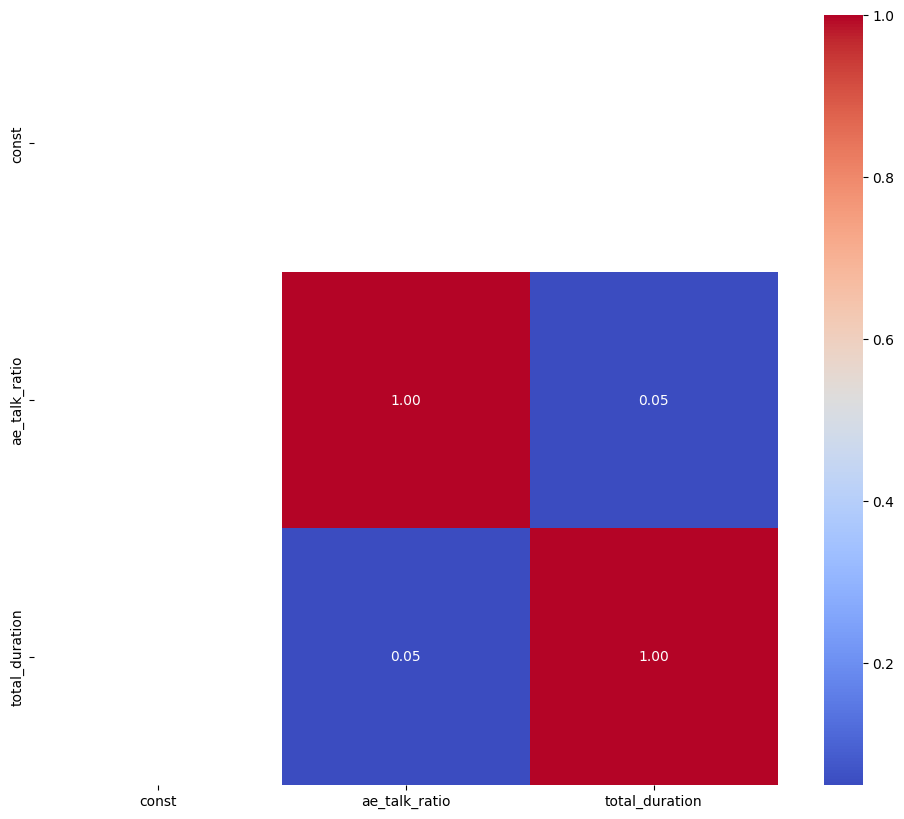

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Regression Coefficients and P-values

In [13]:
# Reset index to turn 'Variable' into a column
regression_df = regression_summary.reset_index()

# Rename columns for clarity
regression_df.rename(columns={
    'index': 'Variable',
    'Coef.': 'Regression Coefficient',
    'P>|z|': 'P-value (Regression)'
}, inplace=True)

# Remove 'const' from the variables
regression_df = regression_df[regression_df['Variable'] != 'const']


## Interpret Results

In [14]:
# Merge correlation and regression data
merged_df = pd.merge(
    corr_df,
    regression_df[['Variable', 'Regression Coefficient', 'P-value (Regression)']],
    on='Variable',
    how='left'
)

# Define interpretation based on p-value
def interpret_p_value(p_value):
    if pd.isnull(p_value):
        return 'N/A'
    elif p_value < 0.05:
        return 'Good Predictor'
    else:
        return 'Not a Good Predictor'

# Apply the interpretation to the merged DataFrame
merged_df['Interpretation'] = merged_df['P-value (Regression)'].apply(interpret_p_value)

## Present Results

In [15]:
# Rearranging columns for presentation
final_df = merged_df[[
    'Variable',
    'Correlation with Sales Outcome',
    'P-value (Correlation)',
    'Regression Coefficient',
    'P-value (Regression)',
    'Interpretation'
]]

# Format numerical values for better readability
final_df['Correlation with Sales Outcome'] = final_df['Correlation with Sales Outcome'].round(4)
final_df['P-value (Correlation)'] = final_df['P-value (Correlation)'].apply(lambda x: f"{x:.3f}")
final_df['Regression Coefficient'] = final_df['Regression Coefficient'].round(4)
final_df['P-value (Regression)'] = final_df['P-value (Regression)'].apply(lambda x: f"{x:.3f}" if not pd.isnull(x) else 'N/A')

# Display the final table
final_df


,Variable,Correlation with Sales Outcome,P-value (Correlation),Regression Coefficient,P-value (Regression),Interpretation
0,ae_talk_ratio,-0.0158,0.471,-0.0438,0.365,Not a Good Predictor
1,total_duration,0.1210,0.000,0.2610,0.000,Good Predictor
